In [80]:
pip install imblearn

In [81]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hassaan2580/churn-prediction-gym-members-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'churn-prediction-gym-members-dataset' dataset.
Path to dataset files: /kaggle/input/churn-prediction-gym-members-dataset


In [82]:
import os

os.listdir(path)

['gym_members_dataset.csv']

In [83]:
import pandas as pd

df = pd.read_csv(os.path.join(path, "gym_members_dataset.csv"))
df.head()

,Member_ID,Name,Age,Gender,Address,Phone_Number,Membership_Type,Join_Date,Last_Visit_Date,Favorite_Exercise,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month,Churn
0,1,NaN,19.0,Male,"Street 171, City 39",032-51510359,Quarterly,2022-07-23,2022-11-03,Pull-ups,93,214.0,13995.0,18.0,No
1,2,Shanza,19.0,Female,"Street 111, City 18",039-19243328,Monthly,2023-12-04,2024-02-14,Squats,37,436.0,4612.0,11.0,No
2,3,Ubaidullah,52.0,Male,"Street 69, City 21",033-60221501,Quarterly,2024-09-13,2024-12-07,Bench Press,98,523.0,3124.0,4.0,Yes
3,4,Mansoor Ahmed,52.0,Male,"Street 72, City 39",035-55527902,Monthly,2024-06-05,2025-02-24,Pull-ups,66,282.0,4586.0,24.0,No
4,5,Hanzala,32.0,Male,"Street 6, City 12",038-93946322,Monthly,2022-06-15,2022-12-02,Bench Press,32,522.0,16353.0,18.0,No


## Data Cleaning and Feature Engineering

We deleted unnecessary columns and transformed the `'Join_Date'` and `'Last_Visit_Date'` columns into numerical features representing the range in days.

- **Unnecessary columns** were removed to reduce noise and focus on relevant features.
- **Date columns** were converted into useful features, such as:
  - `days_since_join` (days since the member joined)
  - `days_since_last_visit` (days since the last visit)

This preprocessing improves model performance and interpretability by providing more informative and consistent features.

In [84]:
df['Join_Date'] = pd.to_datetime(df['Join_Date'])
df['Last_Visit_Date'] = pd.to_datetime(df['Last_Visit_Date'])

df.head()

,Member_ID,Name,Age,Gender,Address,Phone_Number,Membership_Type,Join_Date,Last_Visit_Date,Favorite_Exercise,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month,Churn
0,1,NaN,19.0,Male,"Street 171, City 39",032-51510359,Quarterly,2022-07-23,2022-11-03,Pull-ups,93,214.0,13995.0,18.0,No
1,2,Shanza,19.0,Female,"Street 111, City 18",039-19243328,Monthly,2023-12-04,2024-02-14,Squats,37,436.0,4612.0,11.0,No
2,3,Ubaidullah,52.0,Male,"Street 69, City 21",033-60221501,Quarterly,2024-09-13,2024-12-07,Bench Press,98,523.0,3124.0,4.0,Yes
3,4,Mansoor Ahmed,52.0,Male,"Street 72, City 39",035-55527902,Monthly,2024-06-05,2025-02-24,Pull-ups,66,282.0,4586.0,24.0,No
4,5,Hanzala,32.0,Male,"Street 6, City 12",038-93946322,Monthly,2022-06-15,2022-12-02,Bench Press,32,522.0,16353.0,18.0,No


In [85]:
df['Days_Lasted'] = (df['Last_Visit_Date'] - df['Join_Date']).dt.days
df.head()

,Member_ID,Name,Age,Gender,Address,Phone_Number,Membership_Type,Join_Date,Last_Visit_Date,Favorite_Exercise,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month,Churn,Days_Lasted
0,1,NaN,19.0,Male,"Street 171, City 39",032-51510359,Quarterly,2022-07-23,2022-11-03,Pull-ups,93,214.0,13995.0,18.0,No,103.0
1,2,Shanza,19.0,Female,"Street 111, City 18",039-19243328,Monthly,2023-12-04,2024-02-14,Squats,37,436.0,4612.0,11.0,No,72.0
2,3,Ubaidullah,52.0,Male,"Street 69, City 21",033-60221501,Quarterly,2024-09-13,2024-12-07,Bench Press,98,523.0,3124.0,4.0,Yes,85.0
3,4,Mansoor Ahmed,52.0,Male,"Street 72, City 39",035-55527902,Monthly,2024-06-05,2025-02-24,Pull-ups,66,282.0,4586.0,24.0,No,264.0
4,5,Hanzala,32.0,Male,"Street 6, City 12",038-93946322,Monthly,2022-06-15,2022-12-02,Bench Press,32,522.0,16353.0,18.0,No,170.0


In [86]:
df.drop(columns=['Member_ID', 'Name', 'Phone_Number', 'Address', 'Join_Date', 'Last_Visit_Date',], inplace=True)
df.head()

,Age,Gender,Membership_Type,Favorite_Exercise,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month,Churn,Days_Lasted
0,19.0,Male,Quarterly,Pull-ups,93,214.0,13995.0,18.0,No,103.0
1,19.0,Female,Monthly,Squats,37,436.0,4612.0,11.0,No,72.0
2,52.0,Male,Quarterly,Bench Press,98,523.0,3124.0,4.0,Yes,85.0
3,52.0,Male,Monthly,Pull-ups,66,282.0,4586.0,24.0,No,264.0
4,32.0,Male,Monthly,Bench Press,32,522.0,16353.0,18.0,No,170.0


In [87]:
df.describe()

,Age,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month,Days_Lasted
count,137.000000,150.000000,139.000000,142.000000,138.000000,141.000000
mean,35.905109,73.326667,488.309353,9486.978873,14.224638,184.297872
std,11.654892,25.879560,168.649317,5127.955128,6.385451,115.394525
min,18.000000,30.000000,209.000000,1009.000000,4.000000,0.000000
25%,25.000000,53.000000,341.500000,5274.000000,8.000000,81.000000
50%,36.000000,74.000000,496.000000,9072.500000,14.000000,196.000000
75%,46.000000,94.500000,627.500000,13620.750000,20.000000,281.000000
max,54.000000,119.000000,788.000000,19722.000000,24.000000,399.000000


In [88]:
any_null_columns = df.isna().any()
print(any_null_columns)

Age                          True
Gender                      False
Membership_Type             False
Favorite_Exercise           False
Avg_Workout_Duration_Min    False
Avg_Calories_Burned          True
Total_Weight_Lifted_kg       True
Visits_Per_Month             True
Churn                       False
Days_Lasted                  True
dtype: bool


In [89]:
len(df)

150

In [90]:
df.isnull().sum()

,0
Age,13
Gender,0
Membership_Type,0
Favorite_Exercise,0
Avg_Workout_Duration_Min,0
Avg_Calories_Burned,11
Total_Weight_Lifted_kg,8
Visits_Per_Month,12
Churn,0
Days_Lasted,9


In [143]:
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.metrics import geometric_mean_score


from sklearn.model_selection import train_test_split


def train_val_test_split(df, rstate=42, shuffle=True, stratify=None):
    strat = df[stratify] if stratify else None
    train_set, test_set = train_test_split(
        df, test_size=0.4, random_state=rstate, shuffle=shuffle, stratify=strat)
    strat = test_set[stratify] if stratify else None
    val_set, test_set = train_test_split(
        test_set, test_size=0.5, random_state=rstate, shuffle=shuffle, stratify=strat)
    return (train_set, val_set, test_set)

def remove_labels(df, label_name):
    X = df.drop(label_name, axis=1)
    y = df[label_name].copy()
    return (X, y)

# Dividimos el conjunto de datos
train_set, val_set, test_set = train_val_test_split(df)

X_train, y_train = remove_labels(train_set, 'Churn')
X_val, y_val = remove_labels(val_set, 'Churn')
X_test, y_test = remove_labels(test_set, 'Churn')

X, y = X_train, y_train

all_labels = pd.concat([y_train, y_val, y_test], axis=0)
label_encoder = LabelEncoder().fit(all_labels)

y = label_encoder.transform(y_train)
y_val = label_encoder.transform(y_val)
y_test = label_encoder.transform(y_test)

In [93]:
X.head()

,Age,Gender,Membership_Type,Favorite_Exercise,Avg_Workout_Duration_Min,Avg_Calories_Burned,Total_Weight_Lifted_kg,Visits_Per_Month,Days_Lasted
123,52.0,Female,Monthly,Pull-ups,41,249.0,13617.0,21.0,NaN
24,NaN,Female,Quarterly,Squats,30,256.0,1009.0,18.0,361.0
25,39.0,Male,Quarterly,Deadlift,114,574.0,NaN,24.0,183.0
23,27.0,Male,Yearly,Squats,49,613.0,2699.0,17.0,187.0
94,43.0,Female,Quarterly,Pull-ups,110,214.0,14834.0,4.0,214.0


In [94]:
for col in df.columns:
    print(f"\nColumn: {col}")
    print(df[col].unique())


Column: Age
[19. 52. 32. 53. 46. 36. 41. nan 23. 22. 50. 27. 49. 29. 45. 28. 34. 39.
 20. 25. 51. 54. 47. 44. 43. 42. 33. 35. 48. 18. 24. 40. 21. 38. 37. 30.
 31. 26.]

Column: Gender
['Male' 'Female']

Column: Membership_Type
['Quarterly' 'Monthly' 'Yearly']

Column: Favorite_Exercise
['Pull-ups' 'Squats' 'Bench Press' 'Deadlift' 'Treadmill' 'Cycling']

Column: Avg_Workout_Duration_Min
[ 93  37  98  66  32 102  33 112  42  74  56  77  60  31  86  34  76  44
  43  58  47  49  30 114  71 109  91 113  80  78  53 104  82  87  89 106
 108  55  95  57 117  69  59  61  67  40  50  84  54  81  68  92  90  83
  79 115  72  51  97 110 119 103  62  65  75  46  35  48  41 118 101 116
  64]

Column: Avg_Calories_Burned
[214. 436. 523. 282. 522. 250.  nan 722. 226. 529. 597. 542. 413. 376.
 508. 371. 453. 625. 613. 256. 574. 518. 496. 492. 469. 748. 374. 505.
 377. 575. 481. 261. 767. 474. 263. 292. 627. 209. 590. 315. 471. 390.
 323. 448. 274. 662. 405. 342. 642. 747. 210. 638. 236. 297. 754. 404

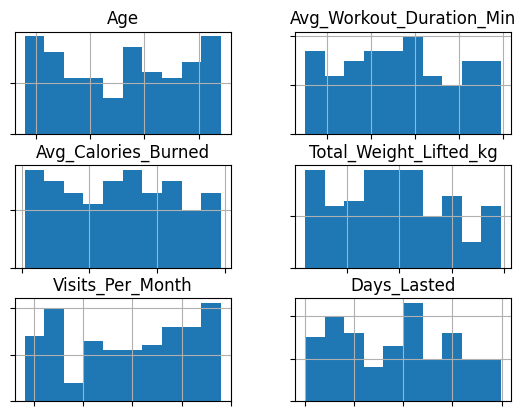

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import mean, std


ax = df.hist()

for axis in ax.flatten():
    axis.set_xticklabels([])
    axis.set_yticklabels([])


plt.show()

In [96]:
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.metrics import make_scorer
from imblearn.metrics import geometric_mean_score


metric = make_scorer(geometric_mean_score)


def evaluate_model(pipeline, X, y):
    cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=1)
    scores = cross_val_score(pipeline, X, y, scoring=metric, cv=cv, n_jobs=-1)
    print(f"Mean G-Mean score: {scores.mean():.4f} (+/- {scores.std():.4f})")
    return scores


def retrieve_models(X):

    num_cols = X.select_dtypes(include=['int64', 'float64']).columns
    cat_cols = X.select_dtypes(include=['object', 'category']).columns

    column_tr = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='mean'),),
                ('scaler', RobustScaler())
            ]), num_cols),
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent'),),
                ('encoder', OneHotEncoder())
            ]), cat_cols)
        ]
    )

    models = dict()
    models['SVC'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', SVC(random_state=42, probability=True))
    ])
    models['LR'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', LogisticRegression(max_iter=1000, random_state=42, solver="lbfgs"))
    ])
    models['LDA'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', LinearDiscriminantAnalysis())
    ])
    models['RF'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', RandomForestClassifier(random_state=42, n_estimators=1000))
    ])
    models['GBC'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', GradientBoostingClassifier(random_state=42))
    ])
    models['ADA'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', AdaBoostClassifier(random_state=42))
    ])
    models['BAG'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', BaggingClassifier(random_state=42))
    ])
    models['GNB'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', GaussianNB())
    ])
    models['DT'] = ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('model', DecisionTreeClassifier(random_state=42))
    ])

    return models

In [97]:
print("Valores únicos en y:", np.unique(y))
print("Conteo de clases:\n", pd.Series(y).value_counts())

Valores únicos en y: [0 1]
Conteo de clases:
 0    63
1    27
Name: count, dtype: int64


Mean G-Mean score: 0.5528 (+/- 0.2562)
SVC: 0.5528112913016882 0.25622622971682274

Mean G-Mean score: 0.8648 (+/- 0.1067)
LR: 0.864800611930439 0.10667314968630781

Mean G-Mean score: 0.8767 (+/- 0.0862)
LDA: 0.8766902294895309 0.08618788119588675

Mean G-Mean score: 0.9686 (+/- 0.0319)
RF: 0.9685730304894465 0.03193311387774696

Mean G-Mean score: 0.9646 (+/- 0.0291)
GBC: 0.9645563759808686 0.029119216534524803

Mean G-Mean score: 0.9646 (+/- 0.0291)
ADA: 0.9645563759808686 0.029119216534524803

Mean G-Mean score: 0.9646 (+/- 0.0291)
BAG: 0.9645563759808686 0.029119216534524803

Mean G-Mean score: 0.8236 (+/- 0.0503)
GNB: 0.8235573365010125 0.050292420946954

Mean G-Mean score: 0.9562 (+/- 0.0323)
DT: 0.9561922733172717 0.03225293463025099



/tmp/ipython-input-4073777938.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(results, labels=models.keys(), showmeans=True)


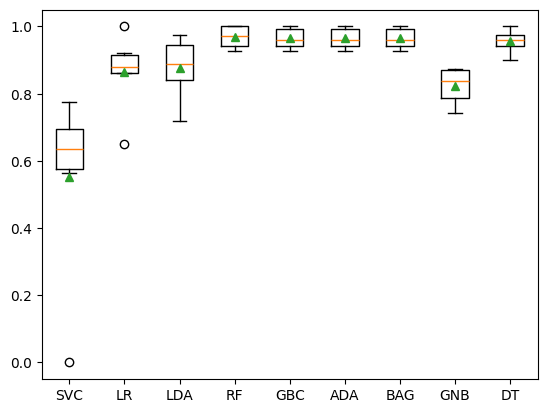

In [102]:
from matplotlib import pyplot


results = list()
model = retrieve_models(X)

for key, value in models.items():
    scores = evaluate_model(value, X, y)
    results.append(scores)
    print(f'{key}: {mean(scores)} {std(scores)}\n')

pyplot.boxplot(results, labels=models.keys(), showmeans=True)
pyplot.show()

## 🏆 Best Model

The best model was **Random Forest**.

- **Mean G-Mean score:**  
  `0.9685 (+/- 0.0319)`

- **Full result:**  
  `RF: 0.9685730304894465 ± 0.03193311387774696`

In [103]:
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN, RandomOverSampler
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, CondensedNearestNeighbour, EditedNearestNeighbours


def get_techniques():

  return {
      # ------------------------------
      #         UNDERSAMPLING
      # ------------------------------

      'random_undersampler':RandomUnderSampler(),
      'tomek_links':TomekLinks(),
      'condensed_nearest_neighbour':CondensedNearestNeighbour(),
      'eited_nearest_neighbours':EditedNearestNeighbours(),

      # ------------------------------
      #        OVERSAMPLING
      # ------------------------------

      'smote':SMOTE(),
      'borderline_smote':BorderlineSMOTE(),
      'svm_smote':SVMSMOTE(),
      'adasyn':ADASYN(),
      'random_oversampler':RandomOverSampler(),

      # ------------------------------
      #           COMBINE
      # ------------------------------

      'smote_tomek':SMOTETomek(),
      'smoteenn':SMOTEENN()
  }

In [104]:
techniques = get_techniques()

In [105]:
def get_pipeline_technique(X, model, technique):

  num_cols = X.select_dtypes(include=['int64', 'float64']).columns
  cat_cols = X.select_dtypes(include=['object', 'category']).columns

  column_tr = ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='mean'),),
                ('scaler', RobustScaler())
            ]), num_cols),
            ('cat', Pipeline([
                ('imputer', SimpleImputer(strategy='most_frequent'),),
                ('encoder', OneHotEncoder())
            ]), cat_cols)
        ]
    )

  return ImbPipeline(steps=[
        ('preprocessor', column_tr),
        ('technique', technique),
        ('model', model)
        ])

Mean G-Mean score: 0.9447 (+/- 0.0278)
random_undersampler: 0.9447348828848482 0.027821952219047107

Mean G-Mean score: 0.9686 (+/- 0.0319)
tomek_links: 0.9685730304894465 0.03193311387774696

Mean G-Mean score: 0.9529 (+/- 0.0348)
condensed_nearest_neighbour: 0.9528699276829579 0.03478472013998759

Mean G-Mean score: 0.9190 (+/- 0.0338)
eited_nearest_neighbours: 0.9189877441559369 0.03377185865275313

Mean G-Mean score: 0.9686 (+/- 0.0319)
smote: 0.9685730304894465 0.03193311387774696

Mean G-Mean score: 0.9503 (+/- 0.0414)
borderline_smote: 0.9502893293756922 0.04137747257387569

Mean G-Mean score: 0.9646 (+/- 0.0291)
svm_smote: 0.9645563759808685 0.0291192165345248

Mean G-Mean score: 0.9544 (+/- 0.0425)
adasyn: 0.9544077196652242 0.042477256759819365

Mean G-Mean score: 0.9648 (+/- 0.0359)
random_oversampler: 0.964786092301848 0.03586867063370318

Mean G-Mean score: 0.9686 (+/- 0.0319)
smote_tomek: 0.9685730304894465 0.03193311387774696

Mean G-Mean score: 0.8622 (+/- 0.0660)
smote

/tmp/ipython-input-3304305266.py:41: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  pyplot.boxplot(valid_results, labels=valid_labels, showmeans=True)


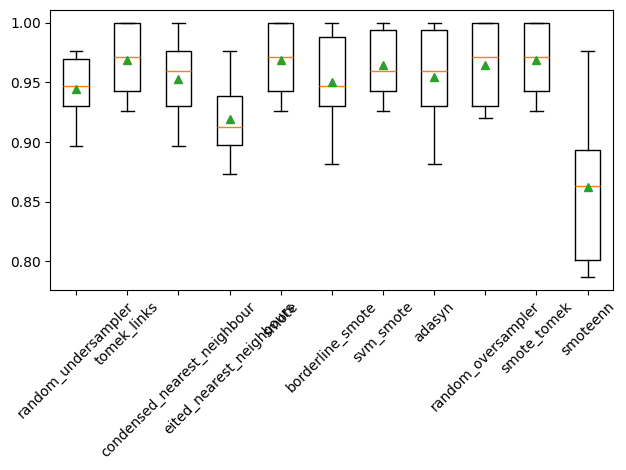

In [107]:
from matplotlib import pyplot
import numpy as np
from numpy import mean, std

results = []
labels = []

for key, technique in techniques.items():
    pipeline = get_pipeline_technique(X, RandomForestClassifier(random_state=42, n_estimators=1000), technique)
    try:
        scores = evaluate_model(pipeline, X, y)
        results.append(scores)
        labels.append(key)
        print(f'{key}: {mean(scores)} {std(scores)}\n')
    except Exception as e:
        results.append([np.nan])
        labels.append(key)
        print(f'{key}: FAILED ({str(e)})\n')

# Solo técnicas válidas (sin NaN)
valid_scores = [mean(s) for s in results if not np.isnan(mean(s))]
valid_labels = [l for l, s in zip(labels, results) if not np.isnan(mean(s))]

# Mejor técnica
best_idx = np.argmax(valid_scores)
best_technique = valid_labels[best_idx]
best_score = valid_scores[best_idx]
best_dict = {best_technique: best_score}

print("\nMejor técnica clave-valor:")
print(best_dict)

# Opcional: muestra desviación estándar también
best_std = std(results[labels.index(best_technique)])
best_full_dict = {best_technique: (best_score, best_std)}
print("\nMejor técnica (con std) clave-valor:")
print(best_full_dict)

# Boxplot solo de válidas
valid_results = [r for r in results if not np.isnan(mean(r))]
pyplot.boxplot(valid_results, labels=valid_labels, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.tight_layout()
pyplot.show()

# 🏆 Best Technique

The best and most consistent technique was **TomekLinks**.

- **Mean G-Mean score:**  
  `0.9686 (+/- 0.0319)`

- **Full result:**  
  `tomek_links: 0.9685730304894465 ± 0.03193311387774696`

  Mean G-Mean score: 0.9686 (+/- 0.0319)
tomek_links: 0.9685730304894465 0.03193311387774696

In [162]:
pipe = get_pipeline_technique(X, RandomForestClassifier(random_state=42, n_estimators=200, class_weight='balanced'), TomekLinks())
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Age', 'Avg_Workout_Duration_Min', 'Avg_Calories_Burned',
       'Total_Weight_Lifted_kg', 'Visits_Per_Month', 'Days_Lasted'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  Index(['Gender', 'Membership_Type', 'Favorite_Exercise'], dtype='object'))])),
                ('technique', TomekLinks()),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, random_state=42))])

## Test Set Evaluation

We tried to predict labels on the test set, but we observed that the model does not perform as well on this data compared to training or validation. This indicates that the test set is more challenging for the model, or that the model may not generalize perfectly to new, unseen data.


In [159]:
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# VALIDATION
print("\n== VALIDATION ==")
y_pred_val = pipe.predict(X_val)
y_pred_val = label_encoder.transform(y_pred_val)
print("Accuracy:", accuracy_score(y_val, y_pred_val))
print("G-Mean:", geometric_mean_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

# TEST
print("\n== TEST ==")
y_pred_test = pipe.predict(X_test)
y_pred_test = label_encoder.transform(y_pred_test)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("G-Mean:", geometric_mean_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


== VALIDATION ==
Accuracy: 0.9333333333333333
G-Mean: 0.8660254037844387
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.96      0.88      0.91        30
weighted avg       0.94      0.93      0.93        30

Confusion Matrix:
 [[22  0]
 [ 2  6]]

== TEST ==
Accuracy: 0.9333333333333333
G-Mean: 0.7071067811865476
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.50      0.67         4

    accuracy                           0.93        30
   macro avg       0.96      0.75      0.81        30
weighted avg       0.94      0.93      0.92        30

Confusion Matrix:
 [[26  0]
 [ 2  2]]


## Why Adjusting the Decision Threshold Improves Results

By default, most classification models use a threshold of 0.5 to decide between classes. However, this value may not be optimal, especially in cases of imbalanced datasets or when the cost of missing positive cases (e.g., customer churn) is high.

In our case, adjusting the threshold allowed us to increase the recall for the minority class ("Yes" for churn), detecting more true positives even if it meant accepting a few more false positives. This approach provides a better balance according to the business objective—catching more potential churns is more important than strictly maximizing accuracy.

**Conclusion:**  
Customizing the threshold helps the model adapt to real-world priorities, providing more meaningful and actionable results for the application context.


In [174]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.metrics import geometric_mean_score

threshold = 0.20

print("\n== VALIDATION ==")
y_proba_val = pipe.predict_proba(X_val)[:, 1]
y_pred_val = (y_proba_val >= threshold).astype(int)
print("Accuracy:", accuracy_score(y_val, y_pred_val))
print("G-Mean:", geometric_mean_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_val))

print("\n== TEST ==")
y_proba_test = pipe.predict_proba(X_test)[:, 1]
y_pred_test = (y_proba_test >= threshold).astype(int)
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("G-Mean:", geometric_mean_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


== VALIDATION ==
Accuracy: 0.9
G-Mean: 0.8461141122266493
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        22
           1       0.86      0.75      0.80         8

    accuracy                           0.90        30
   macro avg       0.89      0.85      0.87        30
weighted avg       0.90      0.90      0.90        30

Confusion Matrix:
 [[21  1]
 [ 2  6]]

== TEST ==
Accuracy: 0.9333333333333333
G-Mean: 0.8492077756084468
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.75      0.75      0.75         4

    accuracy                           0.93        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.93      0.93      0.93        30

Confusion Matrix:
 [[25  1]
 [ 1  3]]
